Given a trajectory dataset 
- plot # trajectory count w.r.t length (bins). Gives you an idea about average length of trajectories.
- plot # trajectory count w.r.t duration (bins). Gives you an idea about average duration of trajectories.

# Fields of a trip dataset
* trip_id: A trip's unique identifier,
* mode:The mode of travel (0=Walk, 1=Vehicle, 2=Unknown),
* end_date: The trip's end date and time in UTC, ISO-8601 format, example: "2014-04-01T08:33:35.000"Z,
* end_dow: The trip's end weekday in local time, where 1=Mon, 2=Tues, 3=Wed, 4=Thurs, 5=Fri, 6=Sat, 7=Su,
* end_lat: The latitude coordinates of the trip's end point in decimal degrees,
* end_lon: The decimal degree longitude coordinates of the trip's end point in decimal degree,
* trip_distance_m: Trip distance in meters,
* vehicle_weight_class: Numeral representing the vehicle weight class

# Fields of waypoint dataset
* w_trip_id: A trip's unique identifier,
* waypoint_seq: The order of the waypoint within the trip starting with "1" and incrementing by one,
* capture_time: The capture date and time of the waypoint in UTC, ISO-8601 format, example: "2014-04-01T08:33:35.000Z",
* lat: The decimal degree latitude coordinates of the waypoint,
* lon: The decimal degree longitude coordinates of the waypoint,
* raw_speed: Raw speed,
* raw_speed_metric: Raw speed metric


# Objective:
- define bins boundaries for length: 5, 10, 20, 30, 50, 100, > 100 
- length of trajectories (count the number of waypoints)
- Number of trajectories in bins [min, max) w.r.t length
- plot lemgth bins VS number
- define bouderies for duration in minutes: 1, 5, 10, 15, 30, 60, > 60 
- Number of trajectories in bins [min, max) w.r.t duration
- plot duration bins VS number



In [1]:
import pandas as pd

# length of all trips

In [2]:
from operator import index


waypoints_file = "sample_waypoints.csv"
# trips_file = "sample_trips.csv"

waypoints_df = pd.read_csv(waypoints_file, index_col=0)
# trips_df = pd.read_csv(trips_file, index_col=0)


# Data Satatistics

In [27]:
print(f"Number of points: {waypoints_df.shape[0]}" )
print(f"Number of trips: {waypoints_df.w_trip_id.unique().shape[0]}")


Number of points: 10000
Number of trips: 37


In [3]:
# trips_df.head()

,trip_id,mode,end_date,end_dow,end_lat,end_lon,trip_distance_m,vehicle_weight_class
0,00049ee09b4319c4dbd5d936b6805f56,1,2019-09-27T14:23:29.000Z,5,52.3400,10.3456,45390.209126,1
1,0007db71fcc2629b21f20e7b585688fc,1,2019-11-19T06:19:44.000Z,2,52.4081,9.7329,14972.302350,1
2,0007db71fcc2629b21f20e7b585688fc,1,2019-11-19T06:19:44.000Z,2,52.4081,9.7329,14972.302350,1
3,0011fa243a004667b151c6b2e48be382,1,2019-09-20T11:01:25.000Z,5,52.2968,9.8262,1847.469459,1
4,0023fc833b1a925baf1d7e2f5e9a6401,1,2019-11-09T16:35:42.000Z,6,52.4200,9.8019,6580.438153,2


In [4]:
waypoints_df.head()

,w_trip_id,waypoint_seq,capture_time,lat,lon,raw_speed,raw_speed_metric
0,000229fa0918ba0950e8059f241c318d,5,2019-09-16T08:20:46.000Z,52.342055,9.761653,49.889664,kph
1,000229fa0918ba0950e8059f241c318d,5,2019-09-16T08:20:46.000Z,52.342055,9.761653,49.889664,kph
2,000229fa0918ba0950e8059f241c318d,1,2019-09-16T08:15:27.000Z,52.344969,9.716048,20.921472,kph
3,000229fa0918ba0950e8059f241c318d,1,2019-09-16T08:15:27.000Z,52.344969,9.716048,20.921472,kph
4,000229fa0918ba0950e8059f241c318d,2,2019-09-16T08:16:57.000Z,52.345270,9.719486,46.670976,kph


In [5]:
length_df = pd.DataFrame({'length': waypoints_df.groupby('w_trip_id')['waypoint_seq'].max()}).reset_index()
length_df.head(2)

,w_trip_id,length
0,000229fa0918ba0950e8059f241c318d,9
1,0008216eee32c3901a4b1e3525f22f2c,57


# count trips in bins w.r.t lengh

In [50]:
bins_boundaries = [5, 10, 20, 30, 50, 100]

list_ = []
for i in range(len(bins_boundaries)):
    min = 0 if i == 0 else bins_boundaries[i-1]
    max = bins_boundaries[i]
    data = {
        "bin": f"[{min}, {max})",
        "count": length_df[(length_df["length"] >= min) & (length_df["length"] < max)].shape[0]
    }
    list_.append(data)
last_data = {
    "bin": f"[{bins_boundaries[i]}, )",
    "count": length_df[(length_df["length"] >= bins_boundaries[i])].shape[0]
}
list_.append(last_data)
bins_df = pd.DataFrame(list_)
bins_df.head(2)

,bin,count
0,"[0, 5)",2
1,"[5, 10)",4


# Plot lemgth bins VS number

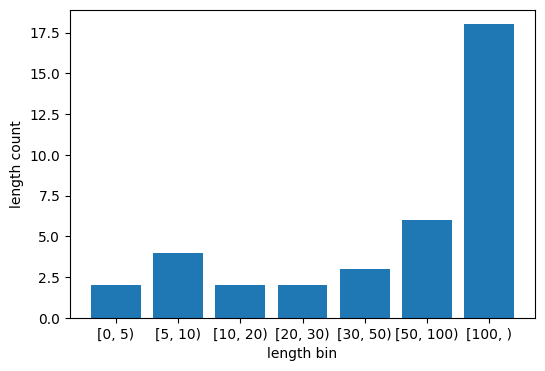

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.bar(bins_df["bin"], bins_df["count"])
ax.set_xlabel("length bin")
ax.set_ylabel("length count")
plt.show()

# duration of all trips

In [9]:
duration_df = pd.DataFrame({'start_time': waypoints_df.groupby('w_trip_id')['capture_time'].min(), 'end_time': waypoints_df.groupby('w_trip_id')['capture_time'].max()}).reset_index()
duration_df.head(2)

,w_trip_id,start_time,end_time
0,000229fa0918ba0950e8059f241c318d,2019-09-16T08:13:57.000Z,2019-09-16T08:26:39.000Z
1,0008216eee32c3901a4b1e3525f22f2c,2019-09-26T04:35:39.000Z,2019-09-26T04:44:11.000Z


In [10]:
duration_df['start_time'] =  pd.to_datetime(duration_df['start_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
duration_df['end_time'] =  pd.to_datetime(duration_df['end_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
duration_df['duration'] = duration_df['end_time'] - duration_df['start_time']
duration_df.head(2)

,w_trip_id,start_time,end_time,duration
0,000229fa0918ba0950e8059f241c318d,2019-09-16 08:13:57,2019-09-16 08:26:39,0 days 00:12:42
1,0008216eee32c3901a4b1e3525f22f2c,2019-09-26 04:35:39,2019-09-26 04:44:11,0 days 00:08:32


# count trips in bins w.r.t duration

In [44]:
from datetime import datetime


Timedelta('0 days 00:01:00')

In [53]:
bins_boundaries = [1, 5, 10, 15, 30, 60]

minute = pd.to_datetime(f"{2}", format="%M") -  pd.to_datetime(f"{1}", format="%M")

list_ = []
for i in range(len(bins_boundaries)):
    min = 0 if i == 0 else bins_boundaries[i-1]
    max = bins_boundaries[i]
    data = {
        "bin": f"[{min}, {max})",
        "count": duration_df[(duration_df["duration"] >= min*minute) & (duration_df["duration"] < max*minute)].shape[0]
    }
    list_.append(data)
last_data = {
    "bin": f"[{bins_boundaries[i]}, )",
    "count": duration_df[(duration_df["duration"] >= bins_boundaries[i]*minute)].shape[0]
}
list_.append(last_data)
bins_df = pd.DataFrame(list_)
bins_df.head(2)

,bin,count
0,"[0, 1)",0
1,"[1, 5)",3


# Plot duration bins VS number

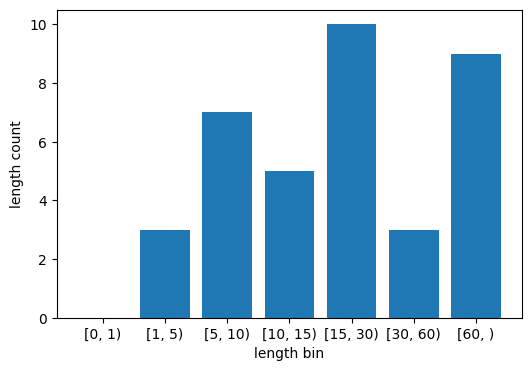

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

ax.bar(bins_df["bin"], bins_df["count"])
ax.set_xlabel("length bin")
ax.set_ylabel("length count")
plt.show()